In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

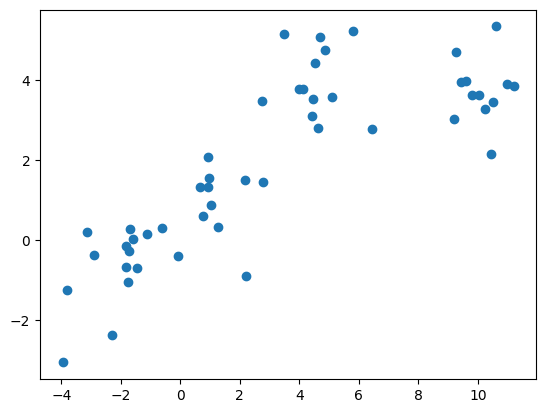

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

In [5]:
agglom = AgglomerativeClustering(n_clusters=4,linkage='average')
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

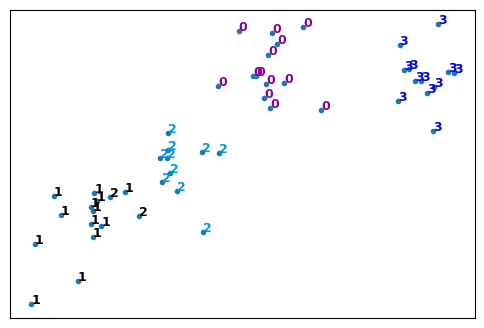

In [6]:
plt.figure(figsize=(6,4))

x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

X1 = (X1 - x_min) / (x_max - x_min)

for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
plt.xticks([])
plt.yticks([])
#plt.axis('off')

plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

In [7]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.36819347 0.59694298 ... 0.30051934 0.57301706 0.35456894]
 [0.36819347 0.         0.94960951 ... 0.65809048 0.93537342 0.02596574]
 [0.59694298 0.94960951 0.         ... 0.42306657 0.0861014  0.93093966]
 ...
 [0.30051934 0.65809048 0.42306657 ... 0.         0.36323332 0.64789749]
 [0.57301706 0.93537342 0.0861014  ... 0.36323332 0.         0.91842358]
 [0.35456894 0.02596574 0.93093966 ... 0.64789749 0.91842358 0.        ]]


In [9]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\JAGADEESH\AppData\Local\Temp\ipykernel_7344\3518085107.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


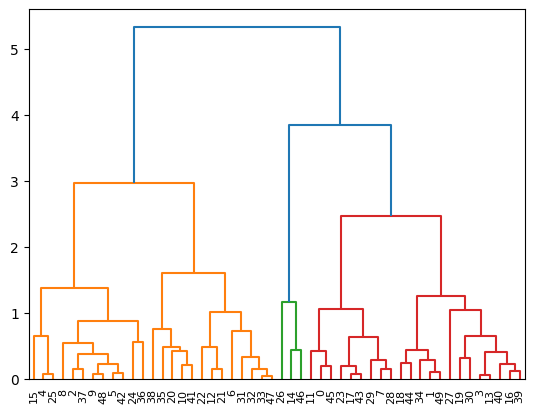

In [10]:
dendro = hierarchy.dendrogram(Z)

C:\Users\JAGADEESH\AppData\Local\Temp\ipykernel_7344\3726426701.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


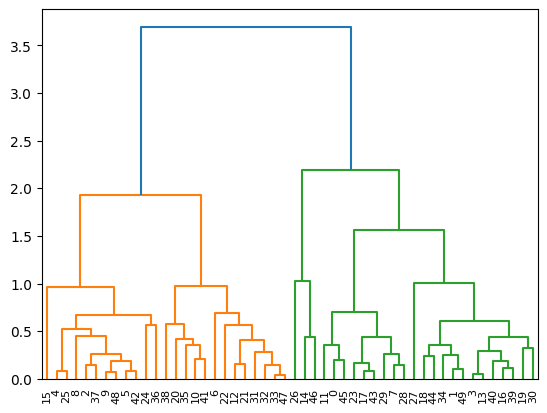

In [11]:
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)